### Task 1B. write code to build a naive Bayes and KNN classifier. You can use the spam_dataset.csv to test it out.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
file_path = 'spam.csv'
df_train = pd.read_csv(file_path)

In [19]:
X_train = df_train.drop(['Email_ID', 'Content', 'Category'], axis=1)  # Features
y_train = df_train['Category'].map({'Spam': 1, 'Ham': 0})  # Convert 'Category' to numerical format

In [21]:
X_test = pd.DataFrame([[0, 0, 1, 0, 1]], columns=X_train.columns)

In [23]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [27]:
print(f"Naive Bayes Classification: {'Spam' if nb_predictions[0] == 1 else 'Ham'}")
print(f"K-Nearest Neighbors Classification: {'Spam' if knn_predictions[0] == 1 else 'Ham'}")

Naive Bayes Classification: Ham
K-Nearest Neighbors Classification: Ham


### Task 2B. Write code to fit the model using KNN; using the spam_dataset.csv, ask to output an ROC curve and AUC score.

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [56]:
file_path = './spam_data.csv'
data = pd.read_csv(file_path)

In [62]:
features = data[['Win', 'Click', 'Team', 'Claim', 'Reminder']]
target = data['Category']
data_type = data['Type']

In [64]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values   

In [66]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Choose k=5 neighbors, can be tuned
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_prob = knn_classifier.predict_proba(X_test)[:, 1]

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

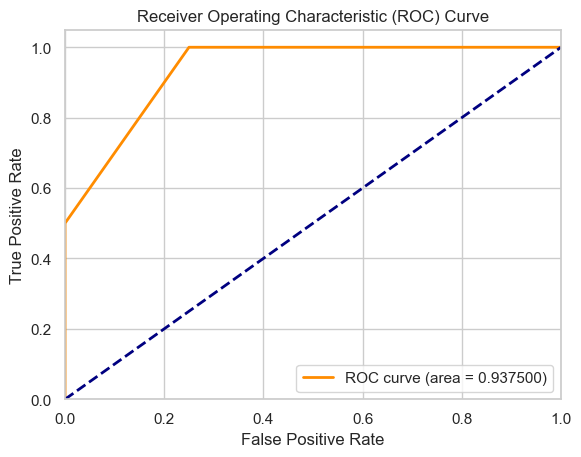

AUC Score: 0.9375


In [82]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)